<a href="https://colab.research.google.com/github/JSJeong-me/LGE-PRI-1st/blob/main/interface-agents/interface_agents_button_click.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Control Panel Switch Operation






In [ ]:
!pip install interfaceagent

In [ ]:
!playwright install

In [ ]:
!pip install httpx==0.27.2

In [4]:
from google.colab import userdata
import openai
import os

os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')
openai.api_key  = os.environ["OPENAI_API_KEY"]

In [5]:
from interfaceagent import WebBrowser, Planner, OpenAIPlannerModel

In [6]:
browser = WebBrowser(start_url="https://jsjeong-me.github.io/ControPanel/",headless=True) # False
model = OpenAIPlannerModel(model="gpt-4o")

To automate the task of finding seven buttons on the specified site, clicking them in sequence ("Speed 1" through "Speed 7") with a 5-second interval, and then exiting, here's the step-by-step instruction in English:

1. Open the Website
  Launch a browser and navigate to the URL:
  https://jsjeong-me.github.io/ControPanel/.

2. Locate the Buttons
  Identify seven buttons labeled from "Speed 1" to "Speed 7" on the webpage.

3. Initiate Button Click Sequence

  Start with the button labeled "Speed 1."
  Click the button.

4. Wait Interval
  After each button click, wait for 5 seconds before proceeding to the next button.

5. Continue Clicking

  Repeat the process for "Speed 2," "Speed 3," ..., up to "Speed 7."
  Ensure the same 5-second interval is maintained between clicks.

6. Exit the Website
  Once all seven buttons are clicked, close the browser to terminate the task.

In [7]:
GET_SPEED = "Speed 3"
task = f"""
Instructions for clicking the {GET_SPEED} button:

1. Open the Website
   - Navigate to https://jsjeong-me.github.io/ControPanel/

2. Locate Speed {GET_SPEED} Button
   - Find the button specifically labeled {GET_SPEED} among the seven speed buttons
   - Verify that this is the correct button before proceeding

3. Click {GET_SPEED} Button
   - Click only the {GET_SPEED} button
   - Do not click any other speed buttons

4. Verify Action
   - Confirm that the fan speed is now set to {GET_SPEED}
   - Ensure no other speed settings were changed

5. Exit Website
   - Close the browser after confirming the speed setting
"""

In [8]:
planner = Planner(model=model, web_browser=browser, task=task)

In [ ]:
result = await planner.run(task=task)

In [10]:
print(result)

{'task': '\nInstructions for clicking the Speed 3 button:\n\n1. Open the Website\n   - Navigate to https://jsjeong-me.github.io/ControPanel/\n\n2. Locate Speed Speed 3 Button\n   - Find the button specifically labeled Speed 3 among the seven speed buttons\n   - Verify that this is the correct button before proceeding\n\n3. Click Speed 3 Button\n   - Click only the Speed 3 button\n   - Do not click any other speed buttons\n\n4. Verify Action\n   - Confirm that the fan speed is now set to Speed 3\n   - Ensure no other speed settings were changed\n\n5. Exit Website\n   - Close the browser after confirming the speed setting\n', 'page_content': {'content': 'Fan Speed: 3\nSpeed 1\nSpeed 2\nSpeed 3\nSpeed 4\nSpeed 5\nSpeed 6\nSpeed 7', 'history': [('click', '#switch3', '')]}, 'page_screenshot': 'screenshot.png', 'status': 'completed', 'completion_reason': "The task is complete because the Speed 3 button was successfully located and clicked, as indicated by the browser action history showing a


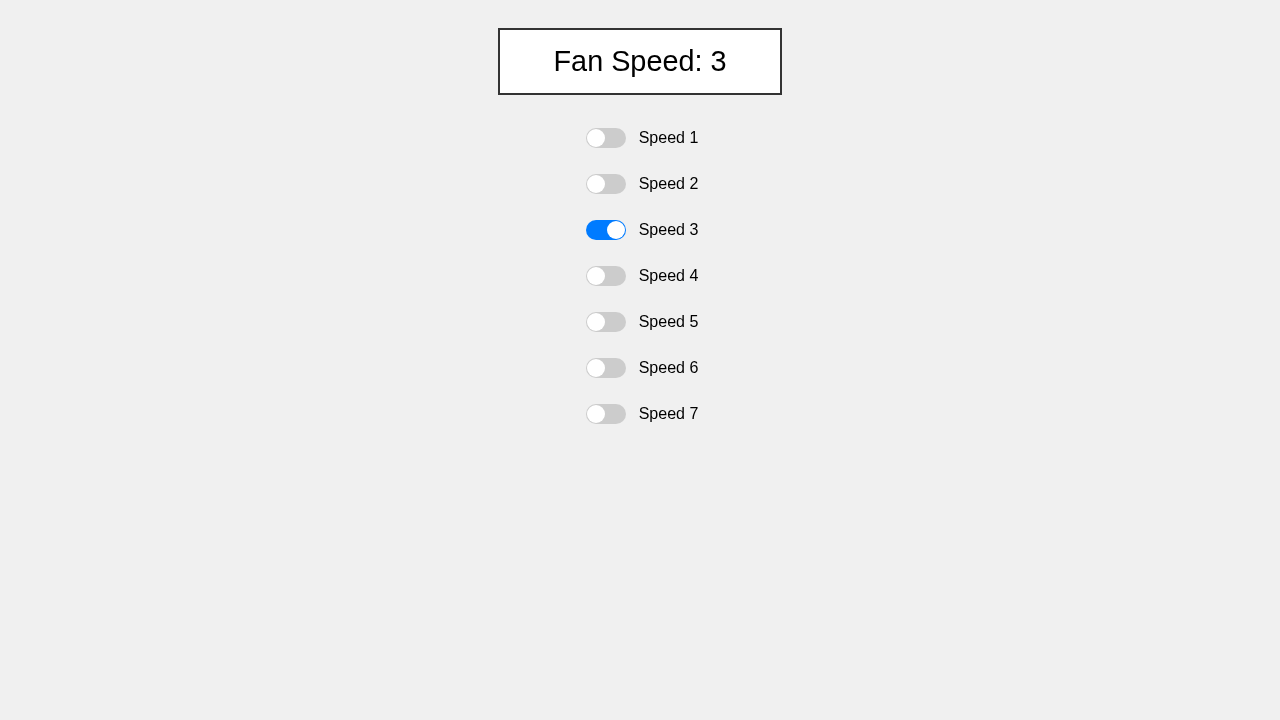

In [11]:
import base64
from IPython.display import HTML

def display_image(file_path):
    # Read the image file
    with open(file_path, "rb") as image_file:
        encoded_string = base64.b64encode(image_file.read()).decode()

    # Create the HTML to display the image
    html = f'<img src="data:image/png;base64,{encoded_string}" />'

    # Display the HTML
    return HTML(html)

# Usage
display_image('screenshot.png')